In [11]:
pip install livelossplot

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from livelossplot import PlotLossesKeras #<= automatyczne tworzenie krzywej uczenia się

from tensorflow.keras.datasets import fashion_mnist

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
assert(X_train.shape == (60000, 28, 28, 1))    
assert(X_test.shape == (10000, 28, 28, 1))    

In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# normalizacja danych
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

num_classes = 10

# one-hot encoding dla zmiennej docelowej
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

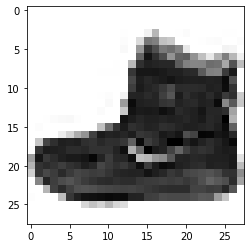

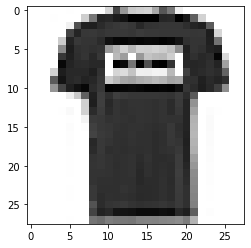

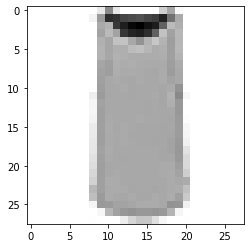

In [8]:
for i in range(3):
    plt.imshow(1-X_train[i][:, :, 0], cmap='gray')
    plt.show()

In [16]:
def get_simple_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

get_simple_cnn().summary()
model=get_simple_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

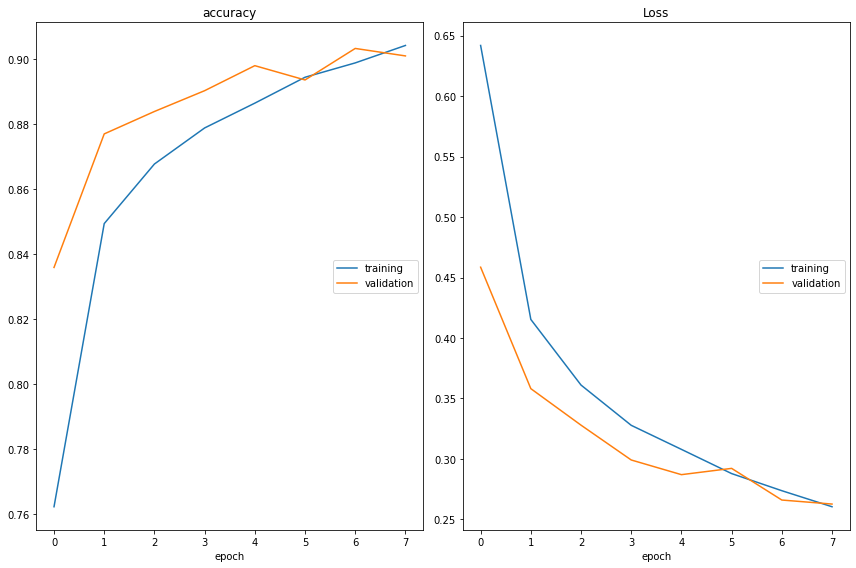

accuracy
	training         	 (min:    0.762, max:    0.904, cur:    0.904)
	validation       	 (min:    0.836, max:    0.903, cur:    0.901)
Loss
	training         	 (min:    0.260, max:    0.642, cur:    0.260)
	validation       	 (min:    0.263, max:    0.459, cur:    0.263)


In [17]:
plot_losses = PlotLossesKeras()

history = model.fit(X_train, y_train,
  batch_size=256, epochs=8,
  verbose=2,
  callbacks=[plot_losses],
  validation_data=(X_test, y_test)
)

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.2627101540565491
Test accuracy: 0.9009000062942505
CNN Error: 9.91%


In [19]:
def get_double_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model = get_double_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)         

In [20]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
235/235 [==============================] - 153s 647ms/step - loss: 0.9963 - accuracy: 0.6399 - val_loss: 0.4149 - val_accuracy: 0.8475
Epoch 2/12
235/235 [==============================] - 127s 540ms/step - loss: 0.4193 - accuracy: 0.8481 - val_loss: 0.3417 - val_accuracy: 0.8742
Epoch 3/12
235/235 [==============================] - 122s 520ms/step - loss: 0.3445 - accuracy: 0.8746 - val_loss: 0.3077 - val_accuracy: 0.8850
Epoch 4/12
235/235 [==============================] - 137s 582ms/step - loss: 0.3101 - accuracy: 0.8865 - val_loss: 0.2851 - val_accuracy: 0.8955
Epoch 5/12
235/235 [==============================] - 137s 580ms/step - loss: 0.2868 - accuracy: 0.8950 - val_loss: 0.2698 - val_accuracy: 0.9015
Epoch 6/12
235/235 [==============================] - 172s 731ms/step - loss: 0.2663 - accuracy: 0.9022 - val_loss: 0.2527 - val_accuracy: 0.9063
Epoch 7/12
235/235 [==============================] - 173s 734ms/step - loss: 0.2477 - accuracy: 0.9064 - val_loss: 0.2356 -

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.21681711077690125
Test accuracy: 0.9210000038146973
CNN Error: 7.90%


In [22]:
y_pred = model.predict(X_test)

In [29]:
from collections import Counter
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
cnt = Counter(y_train)

TypeError: unhashable type: 'numpy.ndarray'